In [1]:
import sys
#sys.path.append("/home/jonas/phd/NanoNetsMF/")
sys.path.append("../..")
import module.components.CONST as CONST
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

def kmc_to_mf(arr):
    I_MF = arr * CONST.electron_charge / 1000
    return I_MF

def exp_func(x,a,b,c,d):
    return a*np.exp(-b*(x-c)) + d

/tmp/ipykernel_3436/680394441.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
# Best Sim
df_best = pd.read_csv("best/Nx=4_Ny=4_Nz=1_Ne=4.csv")
df_best = df_best.sort_values(by='E0',ignore_index=True)
idx     = df_best[(df_best['Jumps'] < 200000000.0) & (df_best['Error'] != 0)].index
df_best = kmc_to_mf(df_best.sort_values(by='E0')['Current'].values)
df_best = df_best[idx]

In [3]:
results_kmc_final       = np.zeros(shape=(100,2))

for i in range(11,16):

    # KMC Part
    data_kmc    = pd.DataFrame()
    times_kmc   = pd.read_csv(f"kmc/{i}_time.csv", header=None)

    for eth in np.linspace(0.05,0.50,100):

        df_kmc  = pd.read_csv(f"kmc/{i}/eth_{eth}_Nx=4_Ny=4_Nz=1_Ne=4.csv")
        df_kmc.loc[df_kmc['Error'] == 0,'Current'] = 0
        df_kmc  = kmc_to_mf(df_kmc.sort_values(by='E0')['Current'].values)
        df_kmc  = df_kmc[idx]

        df_tmp = pd.DataFrame()
        df_tmp[0] = df_kmc
        df_tmp[1] = df_best
        df_tmp    = df_tmp.replace(0, np.nan)
        data_kmc[eth] = np.abs((df_tmp[0] - df_tmp[1])/(df_tmp[1]))

    results_kmc             = pd.DataFrame()
    results_kmc['Acc']      = 100*data_kmc.mean().values
    results_kmc['t']        = 1000*times_kmc/100
    results_kmc_final       += results_kmc.values/5

results_kmc         = pd.DataFrame()
results_kmc['Acc']  = results_kmc_final[:,0]
results_kmc['t']    = results_kmc_final[:,1]

In [4]:
# MF Part
data_mf     = pd.DataFrame()
times_mf    = pd.read_csv("mf2/time.csv", header=None)

for N in range(1,251):

    df_mf   = pd.read_csv(f"mf2/N_{N}_mf_I.csv", header=None)
    df_mf   = df_mf.values.flatten()[idx]

    data_mf[N] = np.abs((df_mf - df_best)/(df_best))

results_mf          = pd.DataFrame()
results_mf['Acc']   = 100*data_mf.mean().values
results_mf['t']     = 1000*times_mf/100

/tmp/ipykernel_3436/2723752900.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_mf[N] = np.abs((df_mf - df_best)/(df_best))
/tmp/ipykernel_3436/2723752900.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_mf[N] = np.abs((df_mf - df_best)/(df_best))
/tmp/ipykernel_3436/2723752900.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-f

In [5]:
# MF Part
data_mf_adam     = pd.DataFrame()
times_mf_adam    = pd.read_csv("mf_adam2/time.csv", header=None)

for N in range(1,251):

    df_mf   = pd.read_csv(f"mf_adam2/N_{N}_mf_I.csv", header=None)
    df_mf   = df_mf.values.flatten()[idx]

    data_mf_adam[N] = np.abs((df_mf - df_best)/(df_best))

results_mf_adam          = pd.DataFrame()
results_mf_adam['Acc']   = 100*data_mf_adam.mean().values
results_mf_adam['t']     = 1000*times_mf/100

/tmp/ipykernel_3436/2778809337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_mf_adam[N] = np.abs((df_mf - df_best)/(df_best))
/tmp/ipykernel_3436/2778809337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_mf_adam[N] = np.abs((df_mf - df_best)/(df_best))
/tmp/ipykernel_3436/2778809337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To 

In [6]:
# MF Part
data_mf_simple     = pd.DataFrame()
times_mf_simple    = pd.read_csv("mf_simple2/time.csv", header=None)

for N in range(1,251):

    df_mf   = pd.read_csv(f"mf_simple2/N_{N}_mf_I.csv", header=None)
    df_mf   = df_mf.values.flatten()[idx]

    data_mf_simple[N] = np.abs((df_mf - df_best)/(df_best))

results_mf_simple          = pd.DataFrame()
results_mf_simple['Acc']   = 100*data_mf_simple.mean().values
results_mf_simple['t']     = 1000*times_mf_simple/100

/tmp/ipykernel_3436/1578436901.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_mf_simple[N] = np.abs((df_mf - df_best)/(df_best))
/tmp/ipykernel_3436/1578436901.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_mf_simple[N] = np.abs((df_mf - df_best)/(df_best))
/tmp/ipykernel_3436/1578436901.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.

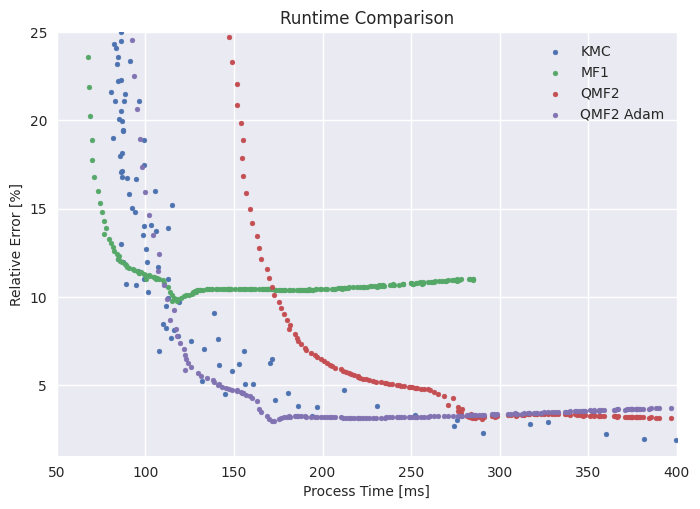

In [7]:
# x_vals = np.linspace(np.min(results_mf_simple['t']),np.max(results_mf_simple['t']),1000)

fig = plt.figure()
ax  = fig.add_subplot()
ax.scatter(results_kmc['t'], results_kmc['Acc'], label='KMC', marker = ".")
ax.scatter(results_mf_simple['t'], results_mf_simple['Acc'], label='MF1', marker = ".")
ax.scatter(results_mf['t'], results_mf['Acc'], label='QMF2', marker = ".")
ax.scatter(results_mf_adam['t'], results_mf_adam['Acc'], label='QMF2 Adam', marker = ".")

# p, cov = curve_fit(exp_func, results_kmc['t'], results_kmc['Acc'])
# ax.plot(x_vals, exp_func(x_vals,*p))

ax.set_xlabel('Process Time [ms]')
ax.set_ylabel('Relative Error [%]')
ax.set_xlim(50,400)
ax.set_ylim(1,25)

ax.legend(title='')
#ax.set_yscale('log')

plt.title("Runtime Comparison")
fig.savefig("../../output/runtime/comparison.pdf")

plt.show()
